<a href="https://colab.research.google.com/github/sajjadhaghighat/NeuralNetwork/blob/master/HW3_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [283]:
import os
import sys
import statistics as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

# 1 - Extract All Numerical Features

In [284]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [285]:
df = pd.read_csv('adult.data',names=data_types,index_col=None,dtype=data_types)
#df = df.drop('final_weight', axis=1)
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,<=50K


In [286]:
df.shape

(32561, 15)

In [287]:
df.dtypes

age                  int64
workclass         category
final_weight         int64
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain       float64
capital_loss         int64
hours_per_week       int64
native_country    category
income_class      category
dtype: object

In [288]:
numdf = df._get_numeric_data()
numdf.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174.0,0,40
1,50,83311,13,0.0,0,13
2,38,215646,9,0.0,0,40
3,53,234721,7,0.0,0,40
4,28,338409,13,0.0,0,40


# 2 - Replace All '?' Values with nan

In [289]:
df.loc[20:30, :]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0,60,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0.0,0,20,United-States,<=50K
22,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0.0,0,40,United-States,<=50K
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,2042,40,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0.0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,40,United-States,<=50K


In [290]:
df = df.replace('?', np.nan)
df[pd.isnull(df).any(axis=1)].head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0,40,NaN,<=50K


In [291]:
df.describe(include='all')

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 3 - Replace All 0 Values with mean of feature values

In [292]:
df['capital_gain'] = df['capital_gain'].replace(0, st.mean(df['capital_gain'].to_list()))
df['capital_loss'] = df['capital_loss'].replace(0, st.mean(df['capital_loss'].to_list()))
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,87.30383,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.648844,87.30383,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.648844,87.30383,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.648844,87.30383,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.648844,87.30383,40,Cuba,<=50K


# 4 - Normalize Numeric Values

In [293]:
normalize_columns = ['age', 'education_num', 'final_weight', 'capital_gain','capital_loss','hours_per_week']
nominal_columns=df.dtypes[df.dtypes == "category"].index.values.tolist()
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df[columns] = scaler.fit_transform(df[columns])
dfnew = df.copy()  
normalize(normalize_columns)
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.014969,-0.216219,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.136342,-0.216219,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.136342,-0.216219,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.136342,-0.216219,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.136342,-0.216219,-0.035429,Cuba,<=50K


# 5 - Divide Age values to 10 bins

In [294]:
#df2= df['age'].value_counts(bins=10,sort=False).to_frame()

In [295]:
df['age_bins'] = pd.qcut(df['age'], q=10, precision=0)
df['age_bins'].value_counts()

(-1.7000000000000002, -1.2]    3895
(-0.4, -0.1]                   3518
(0.8, 1.4]                     3461
(-0.9, -0.6]                   3376
(-1.2, -0.9]                   3301
(-0.1, 0.2]                    3245
(0.5, 0.8]                     3167
(0.2, 0.5]                     3008
(1.4, 3.8]                     2999
(-0.6, -0.4]                   2591
Name: age_bins, dtype: int64

In [296]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,age_bins
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.014969,-0.216219,-0.035429,United-States,<=50K,"(-0.1, 0.2]"
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.136342,-0.216219,-2.222153,United-States,<=50K,"(0.5, 0.8]"
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.136342,-0.216219,-0.035429,United-States,<=50K,"(-0.1, 0.2]"
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.136342,-0.216219,-0.035429,United-States,<=50K,"(0.8, 1.4]"
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.136342,-0.216219,-0.035429,Cuba,<=50K,"(-0.9, -0.6]"


# 6 - Correlation between Features

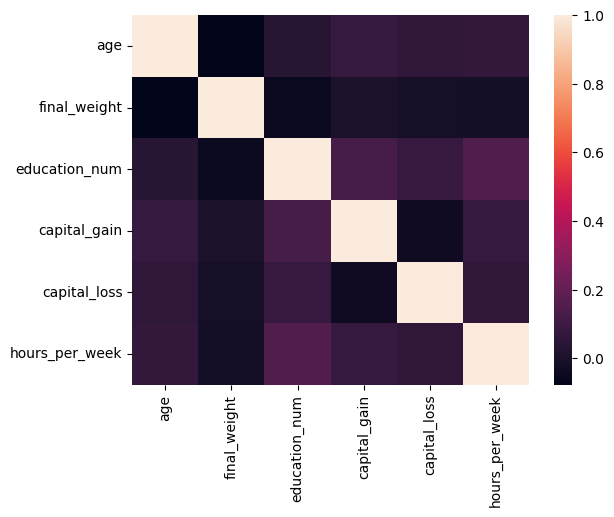

In [297]:
corr = numdf.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
);

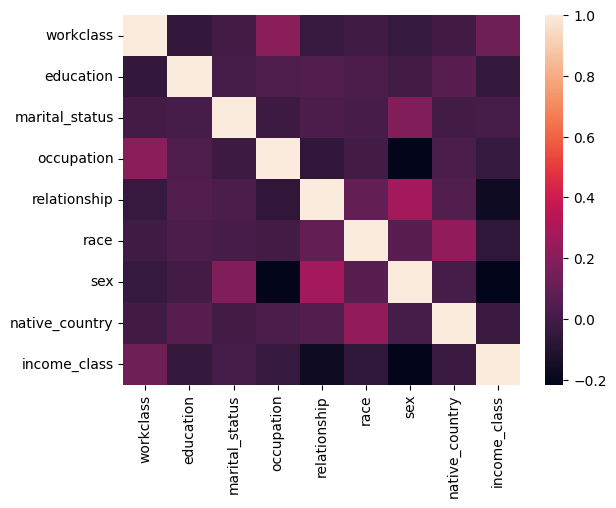

In [298]:

# Simple Pandas Numeric Columns Code

df3 = df[nominal_columns]
corr2 = df3.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(
    corr2, 
    xticklabels=nominal_columns,
    yticklabels=nominal_columns
);

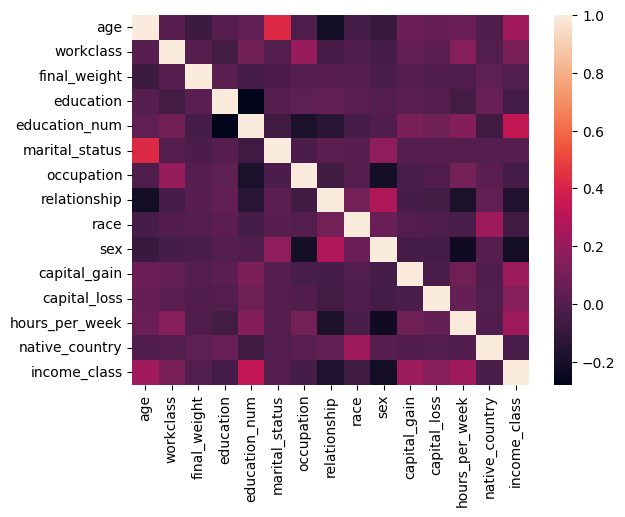

In [300]:
dfnew[nominal_columns] = dfnew[nominal_columns].apply(lambda x: x.factorize()[0])
corr3 = dfnew.corr()
sns.heatmap(
    corr3, 
    xticklabels=corr3.columns.values,
    yticklabels=corr3.columns.values
);